In [1]:
!pip install google-cloud google-cloud-bigquery google-auth

  Obtaining dependency information for google-cloud from https://files.pythonhosted.org/packages/ba/b1/7c54d1950e7808df06642274e677dbcedba57f75307adf2e5ad8d39e5e0e/google_cloud-0.34.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5 from https://files.pythonhosted.org/packages/61/fa/aae8e10512b83de633f2646506a6d835b151edf4b30d18d73afd01447253/protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/434.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/434.5 kB ? eta -:--:--
    --------------------------------------- 10.2/434.5 kB ? eta -:--:--
    --------------------------------------- 10.2/434.5 kB ? eta -:--:--
   -- ------------------------------------ 30.7/434.5 kB 145.2 kB/s eta 0:00:03
   -- ------------------------------------ 30.7/434.5 kB 145.2 kB/s eta 0:00:03
   -- --------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.31.1 requires protobuf<5,>=3.20, but you have protobuf 5.29.3 which is incompatible.


In [2]:
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client

In [3]:
credentials, project_id = load_credentials_from_file('service_account.json')

DefaultCredentialsError: File service_account.json was not found.

In [23]:
# Load data from BigQuery
client = Client(
    project = project_id,
    credentials=credentials
)

In [25]:
type(client)

google.cloud.bigquery.client.Client

In [87]:
# This is how to list the tables
database_id = "music_data"
tables = client.list_tables(database_id)

print(f"Tables contained in '{database_id}':")
for table in tables:
    print(f"{table.project}.{table.dataset_id}.{table.table_id}")

Tables contained in 'music_data':
da26-python.music_data.artists
da26-python.music_data.audio_features
da26-python.music_data.chart_positions
da26-python.music_data.tracks
da26-python.music_data.tracks_artists_mapping


### Loading data from the tables

In [47]:
query = "SELECT * FROM `da26-python.music_data.tracks`"

In [49]:
load_job = client.query(query)

In [53]:
data = load_job.to_dataframe()

In [57]:
def load_data(table):
    query = f"SELECT * FROM `da26-python.music_data.{table}`"
    load_job = client.query(query)
    data = load_job.to_dataframe()
    return data

In [65]:
audio_features = load_data("audio_features")

In [73]:
audio_features.sample(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
7853,6PRh0ilIMEP1xlUHqalnkD,0.835,0.659,4.0,-5.696,1.0,0.3100,0.012300,0.000000,0.372,0.5790,129.930,4.0
8664,6DuRbVj7iCZeMuMYldivIQ,0.450,0.758,11.0,-4.142,1.0,0.0504,0.280000,0.000000,0.153,0.3870,174.003,4.0
1120,38GNzMraWWHDqmxgWEuHWe,0.803,0.463,1.0,-13.944,0.0,0.0676,0.045600,0.000151,0.176,0.0651,101.986,4.0
9471,0nprj2O0teCglthuhzTG5o,0.596,0.921,7.0,-4.987,1.0,0.0504,0.022100,0.000000,0.303,0.7030,104.024,4.0
16,44Du2IM1bGY7dicmLfXbUs,0.500,0.449,0.0,-10.977,1.0,0.4420,0.422000,0.000008,0.115,0.1040,144.206,1.0
4655,16oi4OiKmkO51l60F5R9kR,0.932,0.578,9.0,-4.478,1.0,0.3660,0.115000,0.000000,0.115,0.6230,129.991,4.0
1544,3y1t2sEahs8idFz2tiYNPO,0.523,0.834,6.0,-3.561,1.0,0.0281,0.254000,0.000000,0.393,0.4450,92.990,4.0
3641,05mDaV9Vb3wrzjF6OPZnhq,0.617,0.684,0.0,-3.618,1.0,0.0439,0.054500,0.000000,0.104,0.2950,132.113,4.0
8637,4LvH604nVCMVGlNbjx3Gnk,0.781,0.784,10.0,-5.047,0.0,0.1300,0.077400,0.000000,0.365,0.7380,125.029,4.0
117,0B6hj1IxHLIAhVBxt828KY,0.619,0.870,8.0,-5.888,1.0,0.0372,0.000288,0.802000,0.119,0.4580,121.962,4.0


In [ ]:
# Merge chart_performance with tracks
merged_data = pd.merge(chart_performance, tracks, on="track_id")

# Merge with tracks_artists_mapping and artists
merged_data = pd.merge(merged_data, tracks_artists_mapping, on="track_id")
merged_data = pd.merge(merged_data, artists, on="artist_id")

# Merge with audio_features
final_data = pd.merge(merged_data, audio_features, on="track_id")


b. Top Artists by Popularity and Followers
Identify the most popular artists and their follower counts.

In [ ]:
top_artists = final_data.groupby("artist_id")[["popularity", "followers"]].max().sort_values("popularity", ascending=False).head(10)
print(top_artists)

Trends in Chart Positions

In [ ]:
# Average chart position by week
chart_trends = final_data.groupby("chart_week")["list_position"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=chart_trends, x="chart_week", y="list_position")
plt.xticks(rotation=45)
plt.title("Average Chart Position Over Time")
plt.show()


Audio Features of Top Tracks

In [ ]:
final_data['chart_category'] = final_data['list_position'].apply(lambda x: 'Top 10' if x <= 10 else 'Beyond Top 10')

audio_features_avg = final_data.groupby('chart_category')[['danceability', 'energy', 'valence', 'tempo']].mean()
print(audio_features_avg)


Artist Dominance on the Charts

In [ ]:
# Count of tracks in the top 10 by artist
top_artists_tracks = final_data[final_data['list_position'] <= 10].groupby('name_y')['track_id'].count().sort_values(ascending=False).head(10)  # 'name_y' is the artist's name
print(top_artists_tracks)

# Visualization
top_artists_tracks.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title("Top 10 Artists with Most Tracks in Top 10 Positions")
plt.ylabel("Number of Tracks")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.show()


Genre-Level Analysis
If the dataset includes genres (or if you can infer them from album type), analyze genre trends on the charts.

In [ ]:
# Group by album_type to see performance
genre_chart = final_data.groupby('album_type')['list_position'].mean().sort_values()

# Visualization
genre_chart.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Average Chart Position by Album Type")
plt.ylabel("Average Chart Position")
plt.xlabel("Album Type")
plt.show()


Evolution of Audio Features Over Time

In [ ]:
# Group by chart_week and calculate average audio features
audio_trends = final_data.groupby("chart_week")[["danceability", "energy", "valence"]].mean().reset_index()

# Plot trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=audio_trends, x="chart_week", y="danceability", label="Danceability")
sns.lineplot(data=audio_trends, x="chart_week", y="energy", label="Energy")
sns.lineplot(data=audio_trends, x="chart_week", y="valence", label="Valence")
plt.xticks(rotation=45)
plt.title("Trends in Audio Features Over Time")
plt.ylabel("Average Value")
plt.xlabel("Chart Week")
plt.legend()
plt.show()


9. Explicit Content Analysis
Analyze the presence of explicit tracks in the top chart positions versus others.

In [ ]:
# Percentage of explicit tracks in top 10 vs. beyond top 10
explicit_analysis = final_data.groupby("chart_category")['explicit'].mean()

# Visualization
explicit_analysis.plot(kind='bar', figsize=(8, 5), color='coral')
plt.title("Percentage of Explicit Tracks in Chart Categories")
plt.ylabel("Percentage of Explicit Tracks")
plt.xlabel("Chart Category")
plt.xticks(rotation=0)
plt.show()


In [ ]:
10. Tempo and Popularity Relationship

In [ ]:
# Scatterplot of tempo vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x="tempo", y="popularity", alpha=0.6, hue="chart_category", palette="cool")
plt.title("Tempo vs. Popularity")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.legend(title="Chart Category")
plt.show()


In [1]:
import pandas as pd
df_artists=pd.read_csv('artists.csv')
df_audio_features=pd.read_csv('audio_features.csv')
df_chart_positions=pd.read_csv('chart_positions.csv')
df_tracks=pd.read_csv('tracks.csv')
df_tracks_artists_mapping=pd.read_csv('tracks_artists_mapping.csv')

In [2]:
print(df_artists.columns)
print(df_audio_features.columns)
print(df_chart_positions.columns)
print(df_tracks.columns)
print(df_tracks_artists_mapping.columns)

Index(['Unnamed: 0', 'artist_id', 'name', 'popularity', 'followers'], dtype='object')
Index(['Unnamed: 0', 'track_id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
Index(['Unnamed: 0', 'chart_week', 'list_position', 'track_id'], dtype='object')
Index(['Unnamed: 0', 'track_id', 'name', 'duration_ms', 'release_date',
       'album_type', 'explicit'],
      dtype='object')
Index(['Unnamed: 0', 'artist_id', 'track_id'], dtype='object')


In [3]:
df_chart_positions['chart_week']

0         2021-07-10
1         2003-07-19
2         2003-07-26
3         2003-08-02
4         2003-07-12
             ...    
129300    2004-04-17
129301    2004-08-07
129302    2004-08-14
129303    2004-08-21
129304    2004-08-28
Name: chart_week, Length: 129305, dtype: object

In [4]:
df_chart_positions.sample(10)

,Unnamed: 0,chart_week,list_position,track_id
46690,46690,2004-09-25,63,2mw9UnfWIw9mYPAoDEc4ud
51682,51682,2011-07-16,7,36ux3YuUsGTWPT8fXclS45
126420,126420,2011-10-29,36,7rl1z4j7MurMDnn9rHh4M2
8024,8024,2014-11-01,56,0SqUFLaRXwufRUsJ0t4dXB
96847,96847,2006-01-21,54,5tdbsJQ86BVvjmpTikVP7q
40717,40717,2013-12-28,19,2QtJA4gbwe1AcanB2p21aP
119793,119793,2013-01-05,38,7EZPH9Px3gXlxD5KJDwtwc
121010,121010,2010-10-23,28,7Ie9W94M7OjPoZVV216Xus
112687,112687,2011-09-17,85,6plKFdrBnKF0y3CRuceTDh
14750,14750,2017-09-16,6,0pqnGHJpmpxLKifKRmU6WP


In [5]:
df_chart_positions['chart_week'].nunique()

1294

# Data Preprocessing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Remove the 'Unnamed: 0' columns
dfs = [df_artists, df_audio_features, df_chart_positions, df_tracks, df_tracks_artists_mapping]
for df in dfs:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert date columns to datetime format
df_chart_positions['chart_week'] = pd.to_datetime(df_chart_positions['chart_week'], errors='coerce')
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce')


In [7]:
# Merge datasets to associate artists with chart positions
artist_chart_data = (
    df_chart_positions
    .merge(df_tracks_artists_mapping, on='track_id')
    .merge(df_artists, on='artist_id')
)

# Group by artist and calculate chart statistics
artist_performance = (
    artist_chart_data
    .groupby('name')  # Artist name
    .agg(
        total_chart_appearances=('list_position', 'count'),
        avg_chart_position=('list_position', 'mean')
    )
    .sort_values(by='total_chart_appearances', ascending=False)
)

print(artist_performance.head(10))


               total_chart_appearances  avg_chart_position
name                                                      
Drake                             3205           45.398752
Taylor Swift                      1807           41.167681
Chris Brown                       1538           49.769831
Lil Wayne                         1526           50.462647
Nicki Minaj                       1371           46.668855
Future                            1151           56.643788
Rihanna                           1126           36.139432
DJ Cover This                     1074           37.968343
Kanye West                        1038           48.011561
The Weeknd                        1028           38.152724


In [8]:
df1=artist_chart_data.groupby('name').agg(total_chart_appearances=('list_position', 'count'), avg_chart_position=('list_position', 'mean')).sort_values(by='total_chart_appearances', ascending=False)

In [9]:
artist_chart_data

,chart_week,list_position,track_id,artist_id,name,popularity,followers
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj,45gHcnDnMC15sgx3VL7ROG,42 Dugg,72,1234936
1,2020-03-14,48,01JMnRUs2YOK6DDpdQASGY,45gHcnDnMC15sgx3VL7ROG,42 Dugg,72,1234936
2,2020-03-28,75,01JMnRUs2YOK6DDpdQASGY,45gHcnDnMC15sgx3VL7ROG,42 Dugg,72,1234936
3,2020-07-04,77,01JMnRUs2YOK6DDpdQASGY,45gHcnDnMC15sgx3VL7ROG,42 Dugg,72,1234936
4,2020-06-27,78,01JMnRUs2YOK6DDpdQASGY,45gHcnDnMC15sgx3VL7ROG,42 Dugg,72,1234936
...,...,...,...,...,...,...,...
175524,2005-05-21,51,7zL9xrz5krsuC6qVNluQQw,15GGbJKqC6w0VYyAJtjej6,Fatman Scoop,61,66778
175525,2005-01-29,53,7zL9xrz5krsuC6qVNluQQw,15GGbJKqC6w0VYyAJtjej6,Fatman Scoop,61,66778
175526,2005-05-28,53,7zL9xrz5krsuC6qVNluQQw,15GGbJKqC6w0VYyAJtjej6,Fatman Scoop,61,66778
175527,2005-06-04,64,7zL9xrz5krsuC6qVNluQQw,15GGbJKqC6w0VYyAJtjej6,Fatman Scoop,61,66778


In [10]:
bts_data=artist_chart_data.loc[artist_chart_data.name=='BTS']
bts_data

,chart_week,list_position,track_id,artist_id,name,popularity,followers
104901,2020-03-07,84,0YJFlxeHMUr9MxSDQVuQJA,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104902,2020-03-07,4,0fZRNhPJ4AGmwY7rkpdbqK,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104903,2020-03-14,68,0fZRNhPJ4AGmwY7rkpdbqK,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104904,2020-12-05,72,0hxeouHqP3qzpTHerA7ha2,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104905,2022-08-20,10,0xzI1KAr0Yd9tv8jlIk3sn,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
...,...,...,...,...,...,...,...
105027,2018-06-09,51,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
105028,2018-06-30,65,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
105029,2018-06-23,71,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
105030,2018-07-07,76,6m1TWFMeon7ai9XLOzdbiR,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947


In [11]:
bts_data.sort_values('list_position').head(5)

,chart_week,list_position,track_id,artist_id,name,popularity,followers
104913,2021-06-05,1,1mWdTewIgB3gtBM3TOSFhB,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104922,2021-09-11,1,1mWdTewIgB3gtBM3TOSFhB,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104921,2021-08-07,1,1mWdTewIgB3gtBM3TOSFhB,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104984,2020-10-03,1,5QDLhrAOJJdNAmCTJ8xMyW,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947
104920,2021-07-31,1,1mWdTewIgB3gtBM3TOSFhB,3Nrfpe0tUJi4K4DXYWgMUX,BTS,87,76212947


In [12]:
bts_data = df1[df1.index == 'BTS']

print(bts_data)

      total_chart_appearances  avg_chart_position
name                                             
BTS                       131           41.137405


In [13]:
dfbts=df1.loc['BTS',:]
dfbts

total_chart_appearances    131.000000
avg_chart_position          41.137405
Name: BTS, dtype: float64

# BTS

In [ ]:


# Step 1: Get the artist_id for BTS
bts_artist = df_artists.loc[df_artists['name'] == 'BTS']
bts_id = bts_artist['artist_id'].iloc[0]

# Step 2: Get tracks by BTS
bts_tracks_mapping = df_tracks_artists_mapping.loc[df_tracks_artists_mapping['artist_id'] == bts_id]
bts_track_ids = bts_tracks_mapping['track_id'].unique()

# Step 3: Merge data for detailed analysis
bts_tracks = df_tracks.loc[df_tracks['track_id'].isin(bts_track_ids)]
bts_audio_features = df_audio_features.loc[df_audio_features['track_id'].isin(bts_track_ids)]
bts_chart_positions = df_chart_positions.loc[df_chart_positions['track_id'].isin(bts_track_ids)]

# Merge all data
bts_data = bts_tracks.merge(bts_audio_features, on='track_id', how='left')
bts_data = bts_data.merge(bts_chart_positions, on='track_id', how='left')

# Step 4: Identify top 5 tracks based on list_position (lower is better)
bts_top_tracks = bts_data.sort_values(by='list_position').head(5)

# Step 5: Clean data in a loop
for col in bts_top_tracks.columns:
    # Fill missing values with a placeholder
    bts_top_tracks[col].fillna('Unknown', inplace=True)
    # Strip whitespace from string columns
    if bts_top_tracks[col].dtype == 'object':
        bts_top_tracks[col] = bts_top_tracks[col].str.strip()

# Step 6: Display the top 5 tracks
#print(bts_top_tracks[['name', 'list_position', 'popularity', 'release_date', 'danceability', 'energy']])


In [19]:
bts_top_tracks

,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chart_week,list_position
80,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,1.0,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-26,1
40,5QDLhrAOJJdNAmCTJ8xMyW,Dynamite,199053,Unknown,album,False,0.746,0.765,6.0,-4.410,0.0,0.0993,0.01120,0.0,0.0936,0.737,114.044,4.0,2020-10-03,1
70,5FVbvttjEvQ8r2BgUcJgNg,Life Goes On,207481,Unknown,album,False,0.566,0.716,1.0,-5.733,1.0,0.0424,0.00691,0.0,0.3700,0.450,81.068,4.0,2020-12-05,1
77,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,1.0,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-05,1
78,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,1.0,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-12,1


In [22]:
# Step 4: Rank tracks based on list_position (smaller is better)
bts_data['rank'] = bts_data['list_position'].rank(method='first').astype(int)

# Step 5: Filter top 5 tracks
bts_top_tracks = bts_data[bts_data['rank'] <= 10].sort_values(by='rank')

# Step 6: Clean data in a loop
for col in bts_top_tracks.columns:
    # Fill missing values with a placeholder
    bts_top_tracks[col].fillna('Unknown', inplace=True)
    # Strip whitespace from string columns
    if bts_top_tracks[col].dtype == 'object':
        bts_top_tracks[col] = bts_top_tracks[col].str.strip()
        
bts_top_tracks

,track_id,name,duration_ms,release_date,album_type,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chart_week,list_position,rank
38,5QDLhrAOJJdNAmCTJ8xMyW,Dynamite,199053,Unknown,album,False,0.746,0.765,6.0,-4.410,...,0.0993,0.01120,0.0,0.0936,0.737,114.044,4.0,2020-09-05,1,1
39,5QDLhrAOJJdNAmCTJ8xMyW,Dynamite,199053,Unknown,album,False,0.746,0.765,6.0,-4.410,...,0.0993,0.01120,0.0,0.0936,0.737,114.044,4.0,2020-09-12,1,2
40,5QDLhrAOJJdNAmCTJ8xMyW,Dynamite,199053,Unknown,album,False,0.746,0.765,6.0,-4.410,...,0.0993,0.01120,0.0,0.0936,0.737,114.044,4.0,2020-10-03,1,3
70,5FVbvttjEvQ8r2BgUcJgNg,Life Goes On,207481,Unknown,album,False,0.566,0.716,1.0,-5.733,...,0.0424,0.00691,0.0,0.3700,0.450,81.068,4.0,2020-12-05,1,4
77,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,...,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-05,1,5
78,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,...,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-12,1,6
79,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,...,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-19,1,7
80,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,...,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-06-26,1,8
81,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,...,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-07-03,1,9
82,1mWdTewIgB3gtBM3TOSFhB,Butter,164441,Unknown,single,False,0.759,0.459,8.0,-5.187,...,0.0948,0.00323,0.0,0.0906,0.695,109.997,4.0,2021-07-10,1,10


# Top list Position and how long chart week

In [26]:
# Step 1: Get the artist_id for BTS
bts_artist = df_artists.loc[df_artists['name'] == 'BTS']
bts_id = bts_artist['artist_id'].iloc[0]

# Step 2: Get tracks by BTS
bts_tracks_mapping = df_tracks_artists_mapping.loc[df_tracks_artists_mapping['artist_id'] == bts_id]
bts_track_ids = bts_tracks_mapping['track_id'].unique()

# Step 3: Filter chart data for BTS tracks at list_position 1
bts_chart_data = df_chart_positions[
    (df_chart_positions['track_id'].isin(bts_track_ids)) & (df_chart_positions['list_position'] == 1)
]

# Step 4: Merge with track names for readability
bts_chart_data = bts_chart_data.merge(df_tracks[['track_id', 'name']], on='track_id', how='left')

# Step 5: Count the number of chart weeks at position 1 for each track
bts_top_chart_tracks = (
    bts_chart_data.groupby('name')['chart_week']
    .nunique()
    .reset_index()
    .rename(columns={'chart_week': 'weeks_at_position_1'})
    .sort_values(by='weeks_at_position_1', ascending=False)
)

# Step 6: Display results
print(bts_top_chart_tracks)



                  name  weeks_at_position_1
0               Butter                   10
1             Dynamite                    3
2         Life Goes On                    1
3  Permission to Dance                    1


             avg_chart_position  track_count
album_type                                  
album                 49.912829       114729
single                51.259427        18086
compilation           52.566621         4398


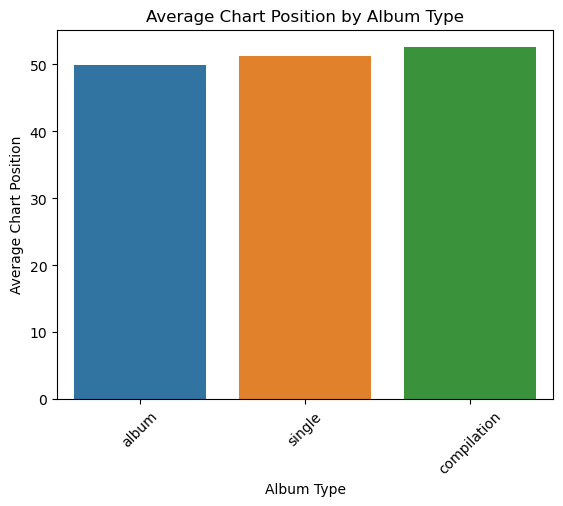

In [14]:
# Merge datasets to analyze album types
album_performance = (
    df_tracks
    .merge(df_chart_positions, on='track_id')
    .groupby('album_type')
    .agg(
        avg_chart_position=('list_position', 'mean'),
        track_count=('track_id', 'count')
    )
    .sort_values(by='avg_chart_position')
)

print(album_performance)

# Visualize
sns.barplot(x=album_performance.index, y=album_performance['avg_chart_position'])
plt.title("Average Chart Position by Album Type")
plt.xlabel("Album Type")
plt.ylabel("Average Chart Position")
plt.xticks(rotation=45)
plt.show()


# Explicit performance

          avg_chart_position  track_count
explicit                                 
False              50.172557        95499
True               50.181857        41714


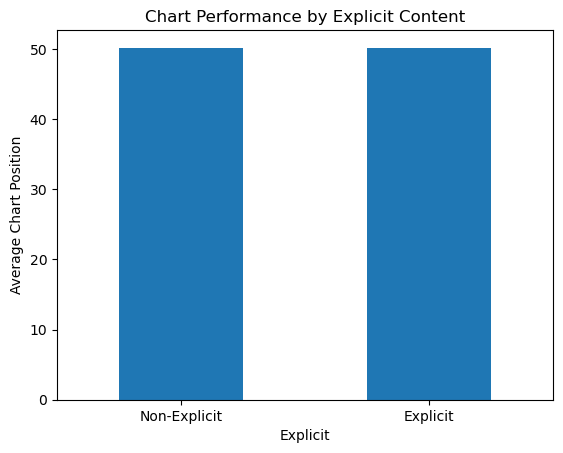

In [16]:
# Merge datasets
explicit_performance = (
    df_tracks
    .merge(df_chart_positions, on='track_id')
    .groupby('explicit')
    .agg(
        avg_chart_position=('list_position', 'mean'),
        track_count=('track_id', 'count')
    )
)

print(explicit_performance)

# Visualize
explicit_performance.plot(kind='bar', y='avg_chart_position', legend=False)
plt.title("Chart Performance by Explicit Content")
plt.xlabel("Explicit")
plt.ylabel("Average Chart Position")
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'], rotation=0)
plt.show()


In [ ]:
# Analyze tempo and popularity
tempo_popularity = (
    df_audio_features
    .merge(df_chart_positions, on='track_id')
)

# Correlation analysis
correlation = tempo_popularity[['tempo', 'list_position']].corr()
print(correlation)

# Scatter plot
sns.scatterplot(data=tempo_popularity, x='tempo', y='list_position')
plt.title("Tempo vs. Chart Position")
plt.xlabel("Tempo")
plt.ylabel("Chart Position")
plt.show()


In [ ]:
df.merge

Summary of Insights to Derive
Artist Dominance: Identify which artists consistently perform well on charts.
Album/Genre Trends: Understand which album types (e.g., singles, albums) perform better.
Audio Evolution: Observe how characteristics of popular music have evolved over time.
Explicit Content Impact: Determine the role of explicit content in chart success.
Tempo-Popularity Link: Assess whether higher/lower tempo influences popularity.